In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import math as mt
import ROOT
import os
import random
import MyFunction as mf
from array import array
from ROOT import TCanvas, gStyle, TFile, TProfile, TNtuple, TH1D, TH2D, TH3D, TGraph, TMultiGraph, TPad, THStack, TH1F, TLegend, gROOT 

#### Graphs for 10 collimated beams represents physical dose

In [27]:
DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Energy Histogram 150MeV/"
DataFileList = os.listdir(DataFileLocation)
File = pd.DataFrame(DataFileList)
print(DataFileList)
display(File)
#DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[])

['Coll_Energy_150MeV_Radius_0.5mm.root', 'Coll_Energy_150MeV_Radius_1.0mm.root', 'Coll_Energy_150MeV_Radius_2.0mm.root', 'Coll_Energy_150MeV_Radius_3.0mm.root', 'Coll_Energy_150MeV_Radius_4.0mm.root', 'Coll_Energy_150MeV_Radius_6.0mm.root', 'Coll_Energy_150MeV_Radius_8.0mm.root', 'Coll_Energy_150MeV_Radius_10.mm.root']


,0
0,Coll_Energy_150MeV_Radius_0.5mm.root
1,Coll_Energy_150MeV_Radius_1.0mm.root
2,Coll_Energy_150MeV_Radius_2.0mm.root
3,Coll_Energy_150MeV_Radius_3.0mm.root
4,Coll_Energy_150MeV_Radius_4.0mm.root
5,Coll_Energy_150MeV_Radius_6.0mm.root
6,Coll_Energy_150MeV_Radius_8.0mm.root
7,Coll_Energy_150MeV_Radius_10.mm.root


In [28]:
DataFileList = [ 'Coll_Energy_150MeV_Radius_0.5mm.root', 'Coll_Energy_150MeV_Radius_1.0mm.root', 
                 'Coll_Energy_150MeV_Radius_2.0mm.root', 'Coll_Energy_150MeV_Radius_3.0mm.root', 
                 'Coll_Energy_150MeV_Radius_4.0mm.root', 'Coll_Energy_150MeV_Radius_6.0mm.root', 
                 'Coll_Energy_150MeV_Radius_8.0mm.root', 'Coll_Energy_150MeV_Radius_10.mm.root']

Energy_Distribution    =  []
Initial_Num_proton     =  []

for i in range(0, len(DataFileList)):
    print(DataFileList[i])
    file = DataFileLocation+"/"+DataFileList[i]
    DataFile = ROOT.TFile(file)
    NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
    print(NumProton)
    Initial_Num_proton.append(NumProton)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.Project3D("xz").Clone(name)
#     RBE = RBEMatrix(file)
#     Distribution.Multiply(RBE)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)

Coll_Energy_150MeV_Radius_0.5mm.root
579241.0
Coll_Energy_150MeV_Radius_1.0mm.root
989047.0
Coll_Energy_150MeV_Radius_2.0mm.root
1365404.0
Coll_Energy_150MeV_Radius_3.0mm.root
1540228.0
Coll_Energy_150MeV_Radius_4.0mm.root
1636603.0
Coll_Energy_150MeV_Radius_6.0mm.root
1554116.0
Coll_Energy_150MeV_Radius_8.0mm.root
1657107.0
Coll_Energy_150MeV_Radius_10.mm.root
1724857.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Info in <TCanvas::Print>: png file /home/fardousr/Desktop/Output/Graphs/2D Energy Histogram.png has been created


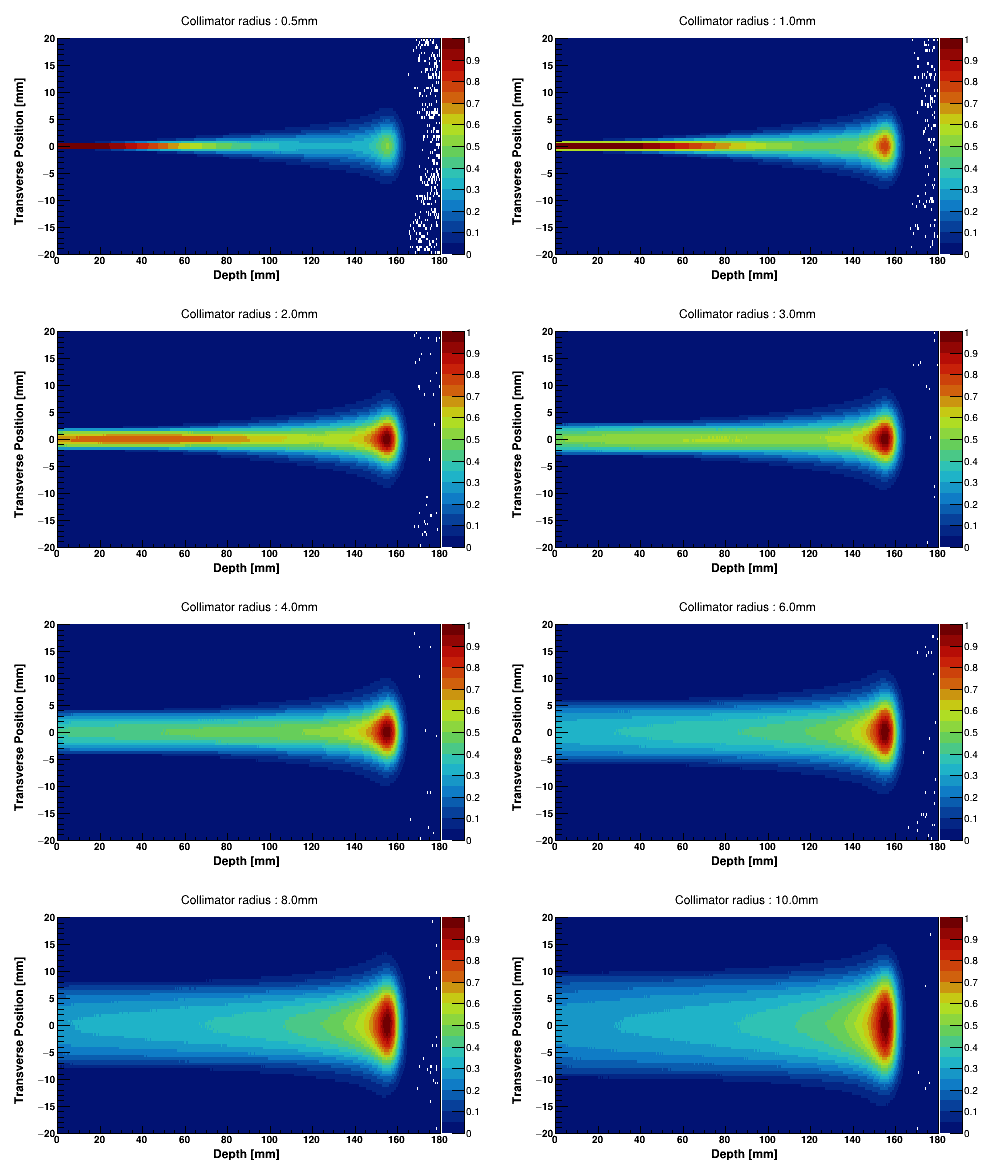

In [30]:
cs = TCanvas("cs","cs", 1000,1200)
gStyle.SetPalette(55)
cs.Divide(2,4)
Radius = ["0.5", "1.0", "2.0", "3.0", "4.0", "6.0", "8.0", "10.0"]
for i in range(0,8):
    cs.cd(i+1);
    cs.SetFillColor( 0 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    
    Histogram = Energy_Distribution[i]
    maxbincontent = Histogram.GetBinContent(Histogram.GetMaximumBin())
    Histogram.Scale(1/maxbincontent)
    Histogram.GetXaxis().SetTitle("Depth [mm]");
    Histogram.GetYaxis().SetTitle("Transverse Position [mm]");
    Histogram.GetXaxis().CenterTitle();
    Histogram.GetYaxis().CenterTitle();
    Histogram.GetXaxis().SetRangeUser(0, 180);
    Histogram.GetYaxis().SetRangeUser(-20, 20);
    Histogram.GetXaxis().SetLabelSize(.04)
    Histogram.GetYaxis().SetLabelSize(.04)
    Histogram.GetZaxis().SetLabelSize(.04)
    Histogram.GetXaxis().SetTitleSize(.05)
    Histogram.GetYaxis().SetTitleSize(.05)
    Title = "Collimator radius : "+Radius[i]+"mm"
    Histogram.SetTitle(Title)
    #Histogram.SetTitleSize(.0)
    Histogram.SetStats(0)
    cs.Modified()
    cs.Update()
    cs.SetRightMargin(0.05)
    cs.SetLeftMargin(0.05)
    cs.SetBottomMargin(0.05)
    
    Energy_Distribution[i].Draw("COLZ")
cs.Print("/home/fardousr/Desktop/Output/Graphs/2D Energy Histogram.png") 
cs.Draw()